# Breast Cancer: Malignant or Benign? 

We have a dataset on whether a breast cancer was classified as malignant or benign in addition to various features for each. 

With this data, it would be nice to have a model that is able to make predictions on the diagnosis based on these physical features.

A practical application of this would be to examine the features, adjust their relative importance to the model several times and see which features or combination of features lead to the best model performance on the test data. This could help medical providers and patients determine what physical characteristics to look for most and make decisions based on whether their cancer is likely malignant. 

Data: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset

- import dataset

- explore dataset, check for missing values and duplicates

- examine features & conduct feature engineering as desired

- split data into training and test sets

- fit model and evaluate performance

In [1]:
#Import necessary libraries for a classification problem

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


C:\Users\Cal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Breast_Cancer_Wisconsin_Diagnostic_Dataset.csv")

## Dataset Exploration

In [3]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


output variable is diagnosis.

several variables are related to size, shape, and texture.

In [4]:
df.shape

(569, 32)

The shape of the data is 569 examples. Not counting the id and diagnosis, we have 30 features.

We will later use a split of 60/20/20 for the test, cv, and test sets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

This tells us all of the names of the features in a list. It also tells us that each has 569 non-null entries, so there is no missing data. 

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The radius and perimeter (two size-related features) have a nearly perfect correlation

## Feature Engineering

In [9]:
#matrix of correlated variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


[Text(0.5, 1.0, 'Correlation Heatmap of Breast Cancer Features')]

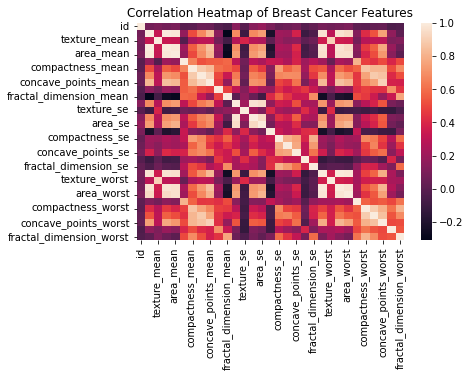

In [10]:
coor_hm = sns.heatmap(df.corr())
coor_hm.set(title = "Correlation Heatmap of Breast Cancer Features")

Visualizing the correlation matrix at a glance using a heatmap

Lighter colors are more correlated, while darker colors are less correlated

Plotting some example variables together

radius and perimeter, two size-related features have a correlation of 0.987

while radius and smoothness are a size feature and a texture feature and have a correlation of only 0.323

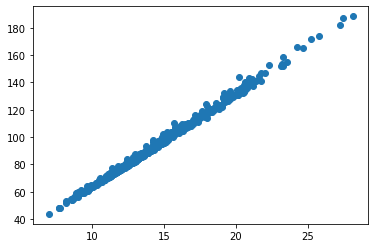

In [11]:
#Plot radius vs perimeter
plt.pyplot.scatter(df.radius_mean,df.perimeter_mean)

As expected these two features almost form a perfect line. As a result we may consider doing some dimensionality reduction and using only one of these features.

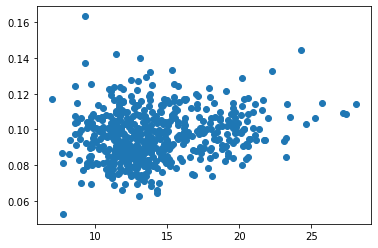

In [12]:
#Plot radius vs smoothness
plt.pyplot.scatter(df.radius_mean,df.smoothness_mean)

As expected these two features do not seem to form any uniform distribution.

## Basic Model

##### Split Data Set

In [37]:
#Confirm the location and count of our outputs
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [39]:
#Assign the outputs as y and the features (remaining columns) as x
y = df.diagnosis
X = df.drop(["id","diagnosis"], axis=1)


In [40]:
#Confirm results are what we expect for x and y

print(y.head())
print (X.head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean 

In [16]:
#split data set setting aside 40% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234 )

####  If we want a CV set as well, simply split the 40% a second time to create a 60-20-20 split 


### Feature scaling

mean normalization & regularization to more accurately fit a model

using this means we have to scale all data, train and future test data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()

StandardScaler()

In [18]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.38149076, -1.38902789, -0.39983422, ..., -0.03132519,
        -0.89029475,  0.0332247 ],
       [-0.21784157, -0.24464768, -0.24728547, ..., -0.57391176,
        -0.40780479, -0.94411495],
       [-0.56455596, -0.95471492, -0.59395048, ..., -0.92504982,
        -0.43551536, -0.2634856 ],
       ...,
       [-0.48966565, -0.17570911, -0.4696515 , ..., -0.24006968,
         0.13988653,  0.13196106],
       [ 1.10522056, -0.15272959,  1.11273905, ...,  0.22215027,
         0.15129676, -0.2504544 ],
       [-0.42032277, -1.28332209, -0.4418053 , ..., -0.80770559,
        -0.91148519, -0.78423221]])

# Fit logistic regression model

In [19]:
lr_model = LogisticRegressionCV(random_state=1234)

In [20]:
lr_model.fit(X_scaled,y_train)

LogisticRegressionCV(random_state=1234)

In [21]:
lr_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [22]:
#scale test data to make predictions because the training set was also scaled
X_test_scaled = scaler.transform(X_test)

In [23]:
#Use the scaled data to make predictions on whether the test examples will be benign or malignant
y_pred = lr_model.predict(X_test_scaled)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B

In [36]:
#See how close the model got to predicting
lr_model.score(X_test_scaled, y_test)

0.956140350877193

95.61% accurate on the test set. Would need to further discuss what an acceptable threshold for this value is. 

On one hand, telling someone that their benign tumor is actually malignant can lead to a drastic response where it wouldn't be needed. On the other hand, people need to know whether to seek treatment or not with the information that their tumor is actually malignant. 

In [25]:
#Compare to the how well the model fits the training data
lr_model.score(X_scaled, y_train) 

0.9912023460410557

99.12% accurate on the training set. As expected more accurate here than the test set.

In [28]:
y_test.head()

531    B
166    B
485    B
66     B
220    B
Name: diagnosis, dtype: object

Over 99% accurate on the training set (which the model was fit to)

# Model Comparison

Above, we showed that radius and perimeter are correlated features. We can drop one of the columns and fit a new model to the modified data. We can then use that model to make predictions and compare the accuracy of the new model to the previous one to see whether any improvement was made.